In [211]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import numpy as np
import matplotlib.pyplot as plt

In [212]:
path_snow = "./data/rasters/SikSik_Snow.tif"
path_veg = "./data/rasters/SikSik_VegMax.tif"
path_dem = "./data/rasters/SikSik_DEM.tif"

src_snow = rasterio.open(path_snow)
src_veg = rasterio.open(path_veg)
src_dem = rasterio.open(path_dem)

In [213]:
array[0][array[0] < 0] = np.nan

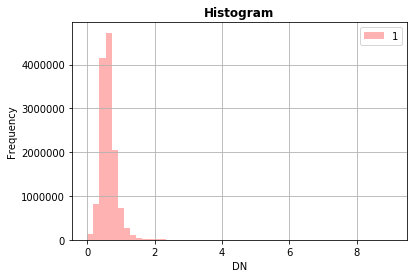

In [214]:
show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [215]:
snow_depths = src.read()
snow_depths = snow_depths[0]
snow_depths = snow_depths[snow_depths > 0]

In [217]:
snow_max = np.round(snow_depths.max()+0.5)
snow_min = 0.1
snow_step = 0.01

bsnow = np.arange(snow_min,snow_max,snow_step)

In [227]:
import scipy
n_samples = 2000
hist, bin_edges = np.histogram(snow_depths, bins=bsnow, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = scipy.interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)

In [228]:
depths_sim = inv_cdf(r)
hist_obs, bin_edges = np.histogram(snow_depths,bins=bsnow, density=True)
hist_sim, bin_edges = np.histogram(depths_sim,bins=bsnow, density=True)

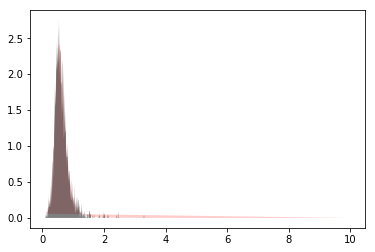

In [229]:
fig, ax = plt.subplots()
ax.fill(bin_edges[:-1], hist_obs, fc='red', alpha=0.2,
        label='input distribution')

ax.fill(bin_edges[:-1], hist_sim, fc='black', alpha=0.5,
        label='input distribution')

In [137]:
hist, bin_edges = np.histogram(snow_depths,bins=bsnow, density=True)

In [138]:
np.sum(hist * np.diff(bin_edges))

1.0000000000000002

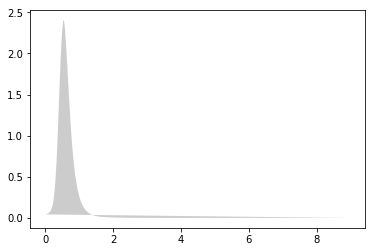

In [194]:
fig, ax = plt.subplots()
ax.fill(bin_edges[:-1], hist, fc='black', alpha=0.2,
        label='input distribution')

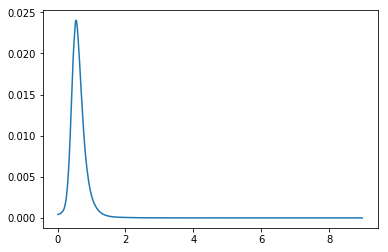

In [139]:
plt.plot(bsnow[:-1], hist * np.diff(bin_edges))

In [142]:
(hist * np.diff(bin_edges)).max()

0.02404526760559296

In [145]:
a = np.random.rand(3, 4, 5)
#a /= a.sum()

In [148]:
from sklearn.neighbors.kde import KernelDensity

In [156]:
kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(snow_depths)

ValueError: Expected 2D array, got 1D array instead:
array=[0.95514399 0.76880556 0.19847305 ... 0.53043944 0.57818896 0.53831297].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [152]:
snow_depths.shape

(1, 4532, 3052)

In [157]:
 X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [158]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [159]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')

In [160]:
kde.fit(snow_depths[:, None])

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [170]:
kde.score_samples(snow_depths[1:5, None])

array([-0.95555923, -1.02718904, -1.10021547, -1.11185259])

In [166]:
snow_depths[1:2, None]

array([[0.76880556]], dtype=float32)

In [168]:
np.array([0.5])

array([0.5])

In [172]:
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

In [176]:
from scipy.stats import norm
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

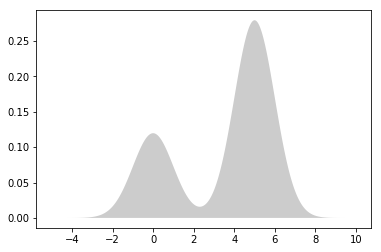

In [179]:
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

In [182]:
snow_depths = src.read()
snow_depths = snow_depths[0]
snow_depths = snow_depths[snow_depths > 0]
snow_depths = snow_depths[:, None]

In [189]:
snow_range = np.linspace(0, snow_depths.max(), 1000)[:, np.newaxis]

In [190]:
snow_depths.pdf(snow_range[:,0])

AttributeError: 'numpy.ndarray' object has no attribute 'pdf'